# Virtual screening for high affinity guests for synthetic supramolecular receptors

## Replication of our analysis in the manuscript using python

In [42]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from simons_data_science_library import dat_tran as dtran
from simons_data_science_library import db_utils as rdc
from simons_data_science_library import plotter 

### We load and clean data from the supporting information

#### Molecular descriptors

In [2]:
tab_gold_wt = rdc.RDSDatabaseConnector.csv_load('gold_weightings.txt', ' ')

our df
   Guest  Ligand_clash  Ligand_torsion  Part_buried  Non-polar  \
0      1           0.0             0.0      -2.1090   -43.3137   
1      2           0.0             0.0      -3.0465   -27.4388   
2      3           0.0             0.0      -2.4099   -41.2634   
3      4           0.0             0.0      -2.2600   -32.0514   
4      5           0.0             0.0      -2.7351   -40.6438   

   Ligand_flexibility  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  


#### ChemPLP scoring function

In [3]:
chemplp_score = rdc.RDSDatabaseConnector.csv_load('chemplp_score.txt', ' ')


our df
   Guest  logKexpt  ChemPLP_Score  Guest.1  logKexpt.1  ChemPLP_Score.1  \
0      1      3.49          49.81       19        4.28            45.54   
1      2      1.15          39.49       20        3.94            50.66   
2      3      3.83          48.47       21        1.15            47.52   
3      4      1.87          38.88       22        1.73            38.51   
4      5      3.96          47.67       23        2.11            39.26   

   Guest.2  logKexpt.2  ChemPLP_Score.2  
0       37        4.90            53.86  
1       38        4.30            57.79  
2       39        4.00            49.12  
3       40        1.95            45.94  
4       41        2.08            53.28  


In [4]:
chemplp_score = dtran.DataTransform.df_reshape_one(chemplp_score,3)
chemplp_score.tail()
print(chemplp_score)

3
    Guest  logKexpt  ChemPLP_Score
0       1      3.49          49.81
1       2      1.15          39.49
2       3      3.83          48.47
3       4      1.87          38.88
4       5      3.96          47.67
5       6      1.52          35.61
6       7      3.88          47.96
7       8      5.00          53.35
8       9      1.86          40.64
9      10      3.49          38.32
10     11      2.83          43.45
11     12      2.18          40.87
12     13      1.48          41.77
13     14      4.30          57.43
14     15      4.20          54.43
15     16      4.88          52.62
16     17      3.98          50.59
17     18      5.26          46.88
18     19      4.28          45.54
19     20      3.94          50.66
20     21      1.15          47.52
21     22      1.73          38.51
22     23      2.11          39.26
23     24      2.62          40.55
24     25      3.32          44.58
25     26      3.60          46.56
26     27      4.04          46.04
27     28      5.1

#### LogK calculated using equation 2

In [5]:
eq2_train_logk = rdc.RDSDatabaseConnector.csv_load('eq2_train_lit_logk.txt', ' ')

our df
   Guest  logKexpt  logKcalc  Guest.1  logKexpt.1  logKcalc.1  Guest.2  \
0      1      3.49      3.28       19        4.28        2.92       37   
1      2      1.15      1.87       20        3.94        2.43       38   
2      3      3.83      3.08       21        1.15        1.99       39   
3      4      1.87      2.34       22        1.73        2.35       40   
4      5      3.96      2.99       23        2.11        2.37       41   

   logKexpt.2  logKcalc.2  
0        4.90        3.27  
1        4.30        3.83  
2        4.00        3.23  
3        1.95        3.65  
4        2.08        0.38  


In [6]:
n_list = list(eq2_train_logk.columns)
print(n_list[2])

logKcalc


In [7]:
eq2_train_logk = dtran.DataTransform.df_reshape_one(eq2_train_logk,3)
eq2_train_logk.tail()

3


,Guest,logKexpt,logKcalc
49,50,2.30,2.98
50,51,0.48,1.96
51,52,0.70,2.56
52,53,0.90,2.12
53,54,0.70,2.67


In [8]:
eq3_train_logk= rdc.RDSDatabaseConnector.csv_load('eq3_train_lit_logk.txt', ' ')

our df
   Guest  logKexpt  logKcalc  Guest.1  logKexpt.1  logKcalc.1  Guest.2  \
0      1      3.49      4.02       19        4.28        3.58       37   
1      2      1.15      2.20       20        3.94        3.52       38   
2      3      3.83      3.75       21        1.15        2.40       39   
3      4      1.87      2.83       22        1.73        2.85       40   
4      5      3.96      3.62       23        2.11        2.87       41   

   logKexpt.2  logKcalc.2  
0        4.90        3.02  
1        4.30        3.82  
2        4.00        3.95  
3        1.95        3.58  
4        2.08        1.75  


In [9]:
eq3_train_logk = dtran.DataTransform.df_reshape_one(eq3_train_logk,3)
eq3_train_logk.tail()

3


,Guest,logKexpt,logKcalc
49,50,2.30,3.66
50,51,0.48,2.29
51,52,0.70,2.19
52,53,0.90,1.58
53,54,0.70,1.41


In [10]:
eq3_test_logk= rdc.RDSDatabaseConnector.csv_load('eq3_test_lit_logk.txt', ' ')

our df


   Guest  logKexpt  logKcalc  Guest.1  logKexpt.1  logKcalc.1
0     55      6.80      7.12     63.0        4.45        4.10
1     56      8.00      6.35     64.0        4.18        4.06
2     57      7.26      6.29     65.0        4.20        4.02
3     58      6.06      6.00     66.0        4.11        4.08
4     59      6.09      5.74     67.0        3.60        3.24


In [ ]:
eq3_test_logk = dtran.DataTransform.df_reshape_one(eq3_test_logk,3)
eq3_test_logk.tail()

2


,Guest,logKexpt,logKcalc
10,65.0,4.20,4.02
11,66.0,4.11,4.08
12,67.0,3.60,3.24
13,68.0,1.11,0.88
14,69.0,3.40,2.51


### Comparision of logKexp and ChemPLP_Score for training set from the manuscript

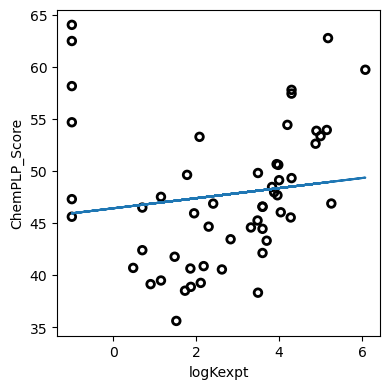

In [12]:
plotter.Plotter.hg_scatter_plt_tl(chemplp_score, 1, 2)

### Multivariate linear regression on the training set from the manuscript using eq. 2

Coefficients = [-4.29538085 -2.3586354   0.23377324 -0.05860376]
RMSE: 1.6599423364936412


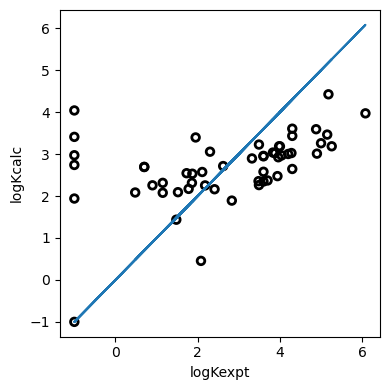

In [13]:
y_train = eq3_train_logk.iloc[:54,1]
x_train = np.array(tab_gold_wt.iloc[:54,1:5])
model = LinearRegression().fit(x_train, y_train)
y_pred = model.predict(pd.DataFrame(x_train))
coeff = model.coef_
print(f'Coefficients = {coeff}')
print(f'RMSE: {root_mean_squared_error(y_train, y_pred)}')
plotter.Plotter.hg_scatter_mod_tl(y_train, y_pred, "logKexpt", "logKcalc")




### Multivariate linear regression on the training set from the manuscript using eq. 3

Coefficients = [-2.55758937  0.4843824  -0.17864573 -0.15504664 -0.99953168]
RMSE: 0.7415595482366735


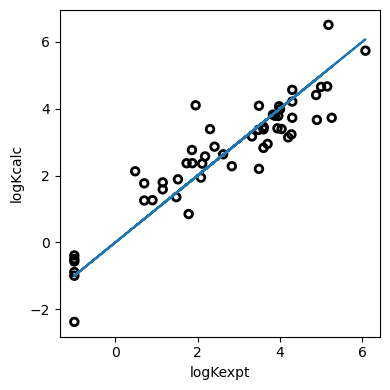

In [14]:
y_train = eq3_train_logk.iloc[:54,1]
x_train = np.array(tab_gold_wt.iloc[:54,1:])
model = LinearRegression().fit(x_train, y_train)
y_pred = model.predict(pd.DataFrame(x_train))
coeff = model.coef_
print(f'Coefficients = {coeff}')
print(f'RMSE: {root_mean_squared_error(y_train, y_pred)}')
plotter.Plotter.hg_scatter_mod_tl(y_train, y_pred, "logKexpt", "logKcalc")

### Analysis of new guests from the manuscripts

RMSE: 0.7180619986113511


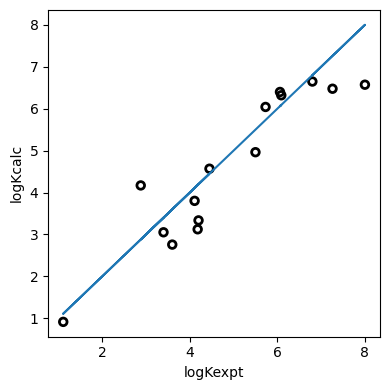

In [16]:
# get GoldPLP functions from the new guests  as an array
x_new = np.array(tab_gold_wt.iloc[54:,1:])
# predict logKcalc for new guests using our models
y_new_pred = model.predict(pd.DataFrame(x_new))
#  turn logKexp for new guests into an array
y_known = np.array(eq3_test_logk.iloc[:,1:2])
# Calculate RMSE for new guest and plot
print(f'RMSE: {root_mean_squared_error(y_known, y_new_pred)}')
plotter.Plotter.hg_scatter_mod_tl(y_known, y_new_pred, "logKexpt", "logKcalc")

## A current data science approach to this data set

In [ ]:
#buld a df for all guest logKexp
exp_cols = [ eq3_train_logk.iloc[:,0:2] , eq3_test_logk.iloc[:,0:2]]
all_logKexp = pd.concat(exp_cols)
all_logKexp = all_logKexp.reset_index(drop=True)
all_logKexp.tail()

,Guest,logKexpt
64,65.0,4.20
65,66.0,4.11
66,67.0,3.60
67,68.0,1.11
68,69.0,3.40


### Run some exploratory data analysis

In [28]:
# Check functions from gold
tab_gold_wt.tail()

,Guest,Ligand_clash,Ligand_torsion,Part_buried,Non-polar,Ligand_flexibility
64,65,0.0,0.0000,-0.5568,-40.2497,0
65,66,0.0,0.0000,-0.5162,-49.7484,1
66,67,0.0,0.0000,-1.7830,-35.1129,0
67,68,0.0,0.0812,-3.8245,-33.5117,2
68,69,0.0,0.0011,-3.8230,-41.0994,1


In [ ]:
# I'll be doing more plotting this time so I'll be OOP
eda = plotter.Plotter()

init_Plotter


['Ligand_clash', 'Ligand_torsion', 'Part_buried', 'Non-polar', 'Ligand_flexibility']


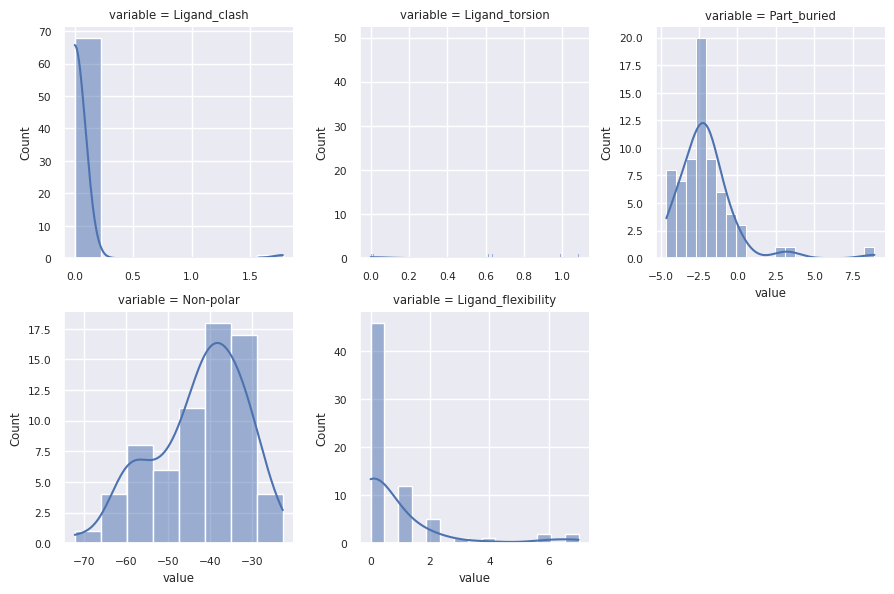

In [36]:
lst_col = list(tab_gold_wt.columns)
lst_col.pop(0)
print(lst_col)
eda.grid_hist_kde(tab_gold_wt,lst_col)

...
 Ligand_torsion


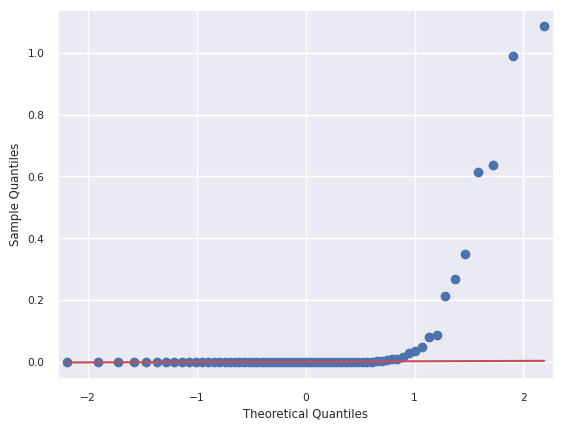


 count    69.000000
mean      0.064996
std       0.206884
min       0.000000
25%       0.000000
50%       0.000000
75%       0.001600
max       1.085500
Name: Ligand_torsion, dtype: float64



In [ ]:
# Lets get some stats ao an odd looking example 'Ligand_torsion'
# doesn't show much I will leave it as is.
eda.q_q_plot(tab_gold_wt,'Ligand_torsion')

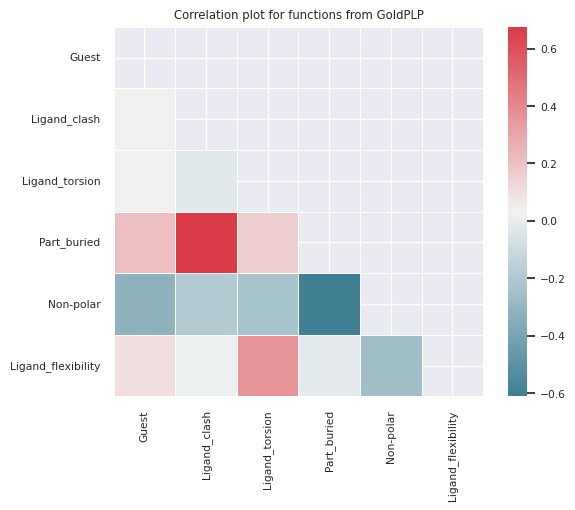

In [ ]:
# Correlation plot show overcorrelation
eda.mat_hm_corr_plot(tab_gold_wt,"Correlation plot for functions from GoldPLP")

In [29]:
# put all gold functions into an array and check shape
x_all = np.array(tab_gold_wt.iloc[:,1:])
x_all.shape

(69, 5)

### Rerun our model

In [55]:
# A Random seed fort the split of test and train
np.random.seed(3)

X = x_all
y = all_logKexp.iloc[:,1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Number of samples in:")
print(f"    Training: {len(y_train)}")
print(f"    Testing: {len(y_test)}")

Number of samples in:
    Training: 55
    Testing: 14


Coefficients = [[-3.61764620e+00  1.85421799e-01 -3.09910583e-03 -1.46467451e-01
  -9.63960385e-01]]
RMSE: 0.4587498164274499


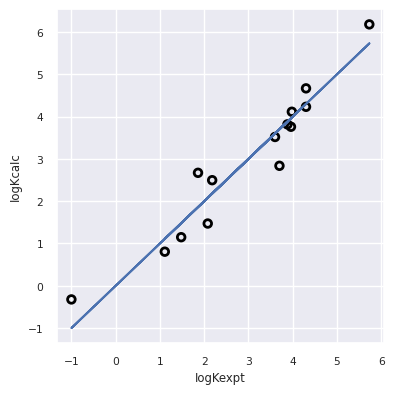

In [56]:


model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(pd.DataFrame(X_test))
coeff = model.coef_
print(f'Coefficients = {coeff}')
print(f'RMSE: {root_mean_squared_error(y_test, y_pred)}')
plotter.Plotter.hg_scatter_mod_tl(y_test, y_pred, "logKexpt", "logKcalc")